In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
print("Setup Complete")

Setup Complete


In [2]:
# Path of the file to read
import os
train_filepath = os.path.abspath("./train.csv")

In [3]:
train_data = pd.read_csv(train_filepath, index_col="PassengerId")

In [4]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S



|Variable	|Definition	|Key|
|-----------|-----------|----|
|survival	|Survival	|0 = No, 1 = Yes|
|pclass	|Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex	|Sex	|  |
|Age	|Age in years	|   |
|sibsp	|# of siblings / spouses aboard the Titanic	|   |
|parch	|# of parents / children aboard the Titanic	|   |
|ticket	|Ticket number	|       |
|fare	|Passenger fare	|       |
|cabin	|Cabin number	|        |
|embarked	|Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton|

## Variable Notes
pclass: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5  
  
sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  
  
parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.  

In [5]:
train_data.shape

(100000, 11)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


In [7]:
survived_unique_count = train_data["Survived"].value_counts().size
pclass_unique_count = train_data["Pclass"].value_counts().size
sex_unique_count = train_data["Sex"].value_counts().size
age_unique_count = train_data["Age"].value_counts().size
name_unique_count = train_data["Name"].value_counts().size
fare_unique_count = train_data["Fare"].value_counts().size
ticket_unique_count = train_data["Ticket"].value_counts().size
cabin_unique_count = train_data["Cabin"].value_counts().size
parch_unique_count = train_data["Parch"].value_counts().size
sibSp_unique_count = train_data["SibSp"].value_counts().size
embarked_unique_count = train_data["Embarked"].value_counts().size
print("Survived unique values count: ",survived_unique_count)
print("Pclass unique values count: ",pclass_unique_count)
print("Sex unique values count: ",sex_unique_count)
print("Age unique values count: ",age_unique_count)
print("Name unique values count:",name_unique_count)
print("Fare unique values count:",fare_unique_count)
print("Ticket unique values count:",ticket_unique_count)
print("Cabin unique values count:",cabin_unique_count)
print("Parch unique values count:",parch_unique_count)
print("SibSp unique values count:",sibSp_unique_count)
print("Embarked unique values count:",embarked_unique_count)

Survived unique values count:  2
Pclass unique values count:  3
Sex unique values count:  2
Age unique values count:  173
Name unique values count: 92144
Fare unique values count: 15935
Ticket unique values count: 75331
Cabin unique values count: 26992
Parch unique values count: 8
SibSp unique values count: 7
Embarked unique values count: 3


<AxesSubplot:>

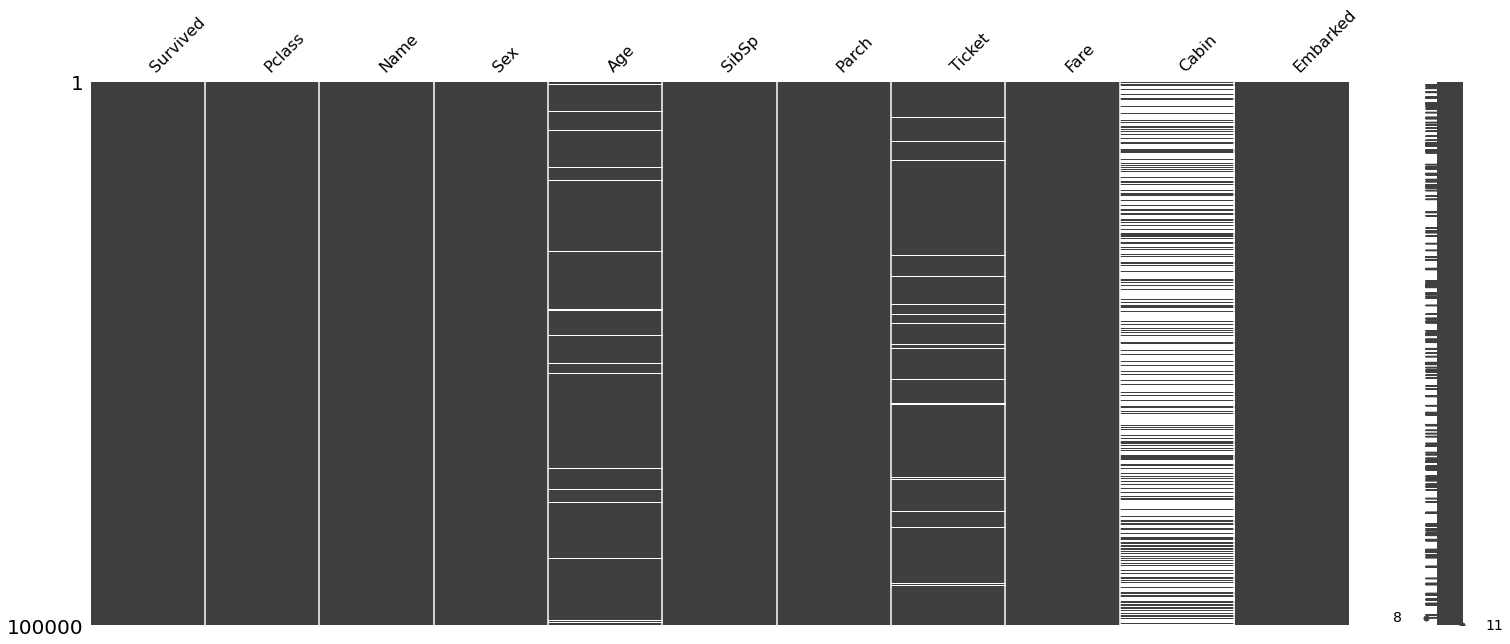

In [8]:
#look at NaN values
msno.matrix(train_data)

In [9]:
# for my opinion Cabin and Ticket data is useless so I'll drop it
train_data=train_data.drop(columns=['Cabin']) 
#train_data['Cabin'] = train_data['Cabin'].fillna('UNKNOWN') - if we don't want loose Cabin data use this method

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 8.4+ MB


In [11]:
#we can drop useless data about ticket
train_data=train_data.drop(columns=['Ticket']) 
#train_data=train_data.dropna()- if we don't want thinking about other NaN values but in the end 

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Fare      99866 non-null   float64
 8   Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 7.6+ MB


In [13]:
# count,  mean, standard deviation, min, max
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [14]:
#median
train_data.median()

C:\Users\D9F8~1\AppData\Local\Temp/ipykernel_6564/1061934745.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_data.median()


Survived     0.00
Pclass       2.00
Age         39.00
SibSp        0.00
Parch        0.00
Fare        24.46
dtype: float64

In [15]:
#So lets change NaN in Age and Fare to median value

train_data["Age"]=train_data["Age"].fillna(train_data["Age"].median())
train_data["Fare"]=train_data["Fare"].fillna(train_data["Fare"].median())

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       100000 non-null  float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Fare      100000 non-null  float64
 8   Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 7.6+ MB


<AxesSubplot:xlabel='Embarked', ylabel='count'>

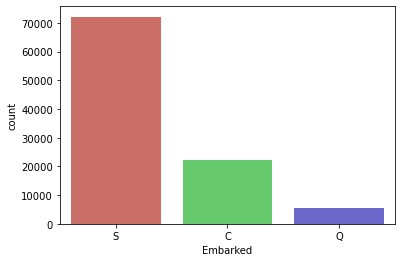

In [17]:
# lets see what data in Embarked column
sns.countplot(x = 'Embarked', data = train_data,palette = 'hls')

Majority of the passengers boarded from S. So, the missing values can be filled with S.

In [18]:
train_data["Embarked"]=train_data["Embarked"].fillna("S")

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       100000 non-null  float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Fare      100000 non-null  float64
 8   Embarked  100000 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 9.6+ MB


In [20]:
#variance
train_data.var()

C:\Users\D9F8~1\AppData\Local\Temp/ipykernel_6564/1626770990.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_data.var()


Survived       0.244781
Pclass         0.701787
Age          324.358520
SibSp          0.744020
Parch          0.902644
Fare        4836.622038
dtype: float64

In [21]:
#mode
train_data.mode()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Johnson, John",male,39.0,0,0,24.46,S


In [22]:
# Age range and interquartile range
age_q75, age_q25 = np.percentile(train_data['Age'], [75 ,25])
age_iqr = age_q75 - age_q25

age_range = train_data['Age'].max()-train_data['Age'].min()

print("Age interquartile range", age_iqr)
print("Age range", age_range)

Age interquartile range 28.0
Age range 86.92


In [23]:
# Fare range and interquartile range
fare_q75, fare_q25 = np.percentile(train_data['Fare'], [75 ,25])
fare_iqr = fare_q75 - fare_q25

fare_range = train_data['Fare'].max()-train_data['Fare'].min()

print("Fare interquartile range", fare_iqr)
print("Fare range", fare_range)

Fare interquartile range 23.43
Fare range 743.98


<AxesSubplot:xlabel='Pclass', ylabel='count'>

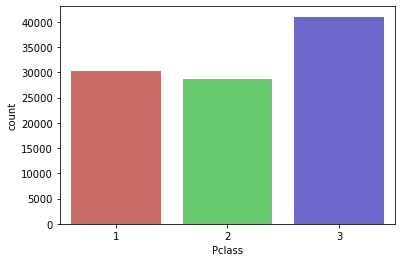

In [24]:
sns.countplot(x = 'Pclass', data = train_data,
            palette = 'hls' 
            )

largest number of people - 3rd class, then 1st class and 2nd

<Figure size 1152x576 with 0 Axes>

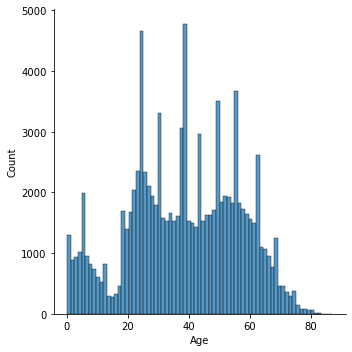

In [25]:
plt.figure(figsize=(16,8))
sns.displot(x = 'Age', data = train_data)

<AxesSubplot:xlabel='Age'>

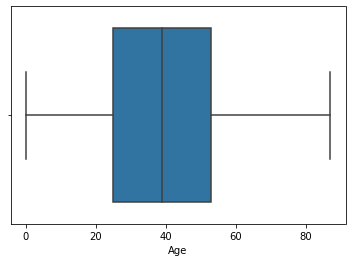

In [26]:
sns.boxplot(x = 'Age', data = train_data)

In [27]:
#major age range 20-60

<AxesSubplot:xlabel='Survived', ylabel='count'>

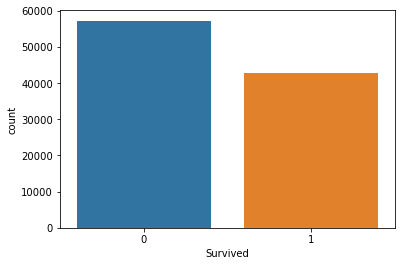

In [28]:
#how much survived or not
sns.countplot(x = 'Survived', data = train_data)

About 40% are survived

<AxesSubplot:xlabel='Sex', ylabel='count'>

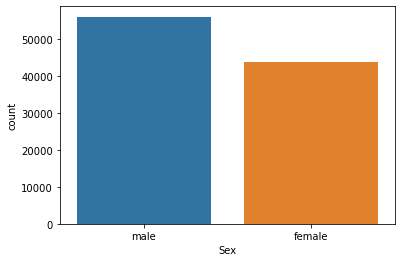

In [29]:
#count male and female
sns.countplot(x = 'Sex', data = train_data)

40% women and 60% man

<AxesSubplot:xlabel='SibSp', ylabel='count'>

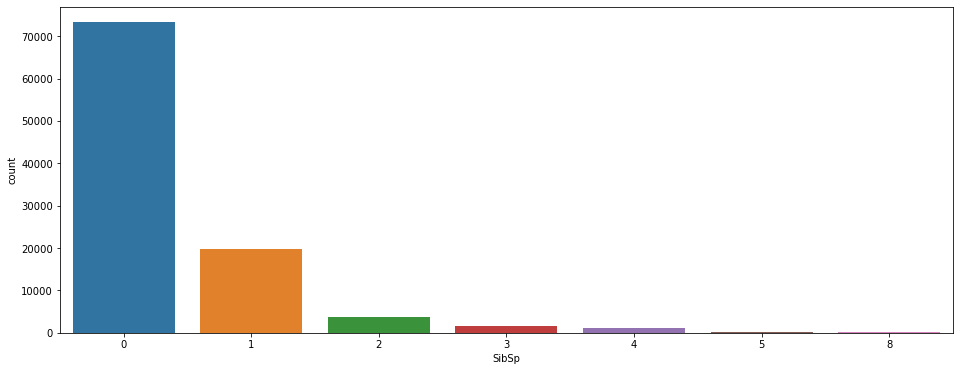

In [30]:
#people that have siblings / spouses aboard the Titanic
plt.figure(figsize=(16,6))
sns.countplot(x = 'SibSp', data = train_data)

<AxesSubplot:xlabel='Parch', ylabel='count'>

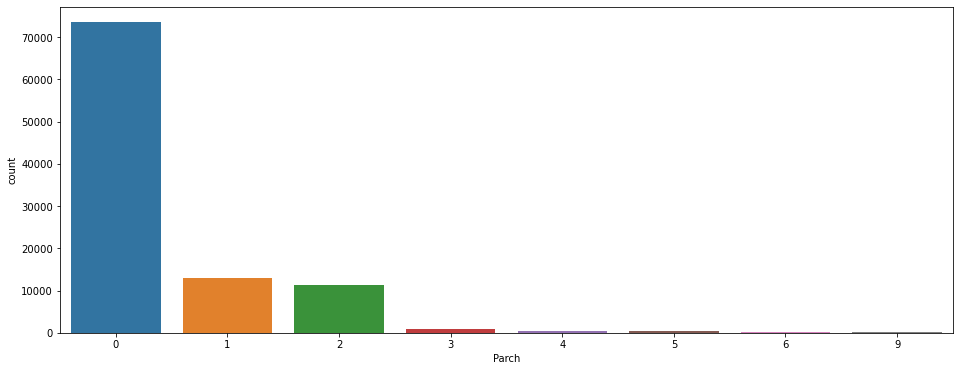

In [31]:
#people that have parents / child aboard the Titanic
plt.figure(figsize=(16,6))
sns.countplot(x = 'Parch', data = train_data)

<AxesSubplot:xlabel='Parch'>

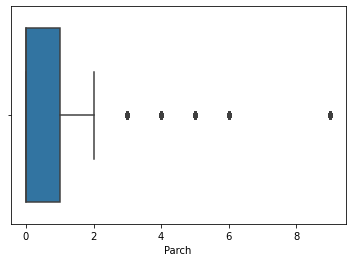

In [32]:
sns.boxplot(x = 'Parch', data = train_data)

Parch has outliers so change to median last values (>6)

<AxesSubplot:xlabel='Parch'>

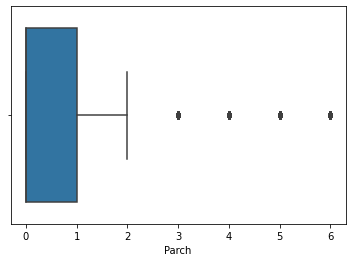

In [33]:
#change outlier (>6) to median
parch_median = train_data['Parch'].median()
train_data.loc[train_data['Parch'] > 6 , 'Parch'] = parch_median
sns.boxplot(x = 'Parch', data = train_data)

<AxesSubplot:xlabel='SibSp'>

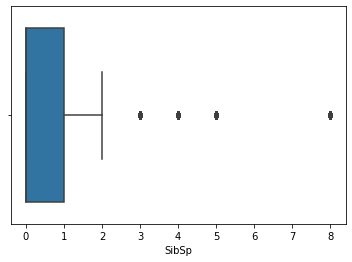

In [34]:
sns.boxplot(x = 'SibSp', data = train_data)

SibSp has outliers too so change to median last values (>5)

<AxesSubplot:xlabel='SibSp'>

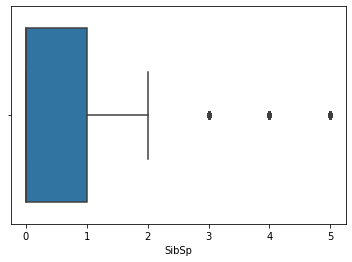

In [35]:
#change outlier (>6) to median
sibSp_median = train_data['SibSp'].median()
train_data.loc[train_data['SibSp'] >5 , 'SibSp'] = sibSp_median
sns.boxplot(x = 'SibSp', data = train_data)

<Figure size 1152x576 with 0 Axes>

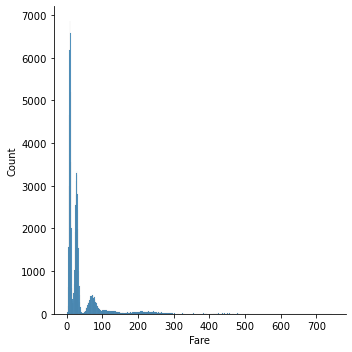

In [36]:
# Fare
plt.figure(figsize=(16,8))
sns.displot(x = 'Fare', data = train_data)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

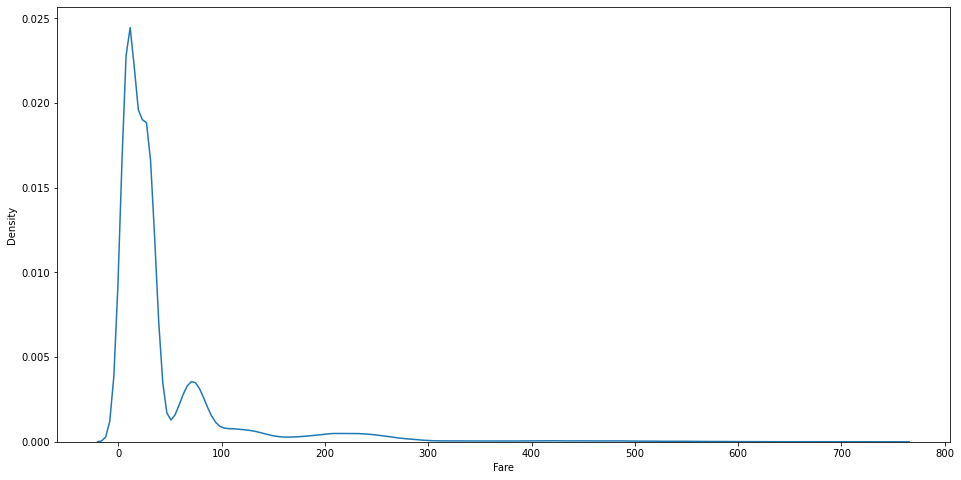

In [37]:
plt.figure(figsize=(16,8))
sns.kdeplot(x = 'Fare', data = train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

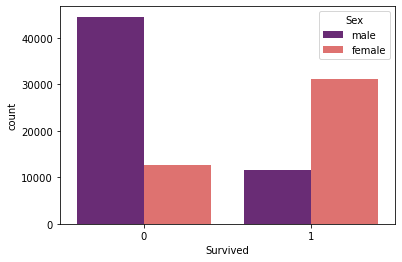

In [38]:
sns.countplot(x = 'Survived', hue = 'Sex', data = train_data, palette = 'magma')


the survival rate of men is around 20% and that of women is around 75%

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

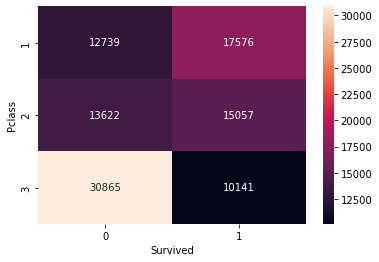

In [39]:
# Group the dataset by Pclass and Survived and then unstack them
group = train_data.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
sns.heatmap(pclass_survived, annot = True, fmt ="d")

It helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa. Class 1 passengers have a higher survival chance compared to classes 2 and 3.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

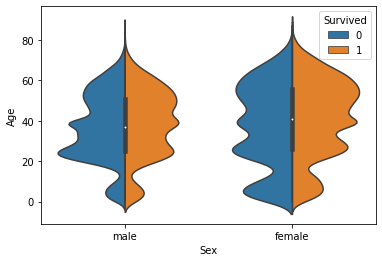

In [40]:
# Violinplot Displays distribution of data
# across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = train_data, split = True)

This graph gives a summary of the age range of men, women and children who were saved.  
The survival rate is  
- High for women in the age range 30-70.
- High for men in the age range 40-70.

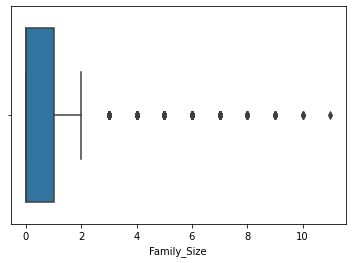

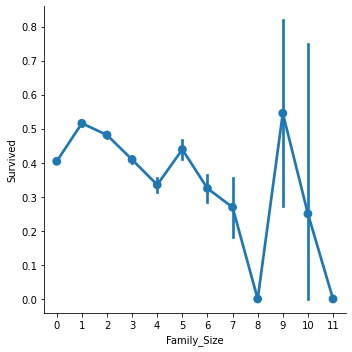

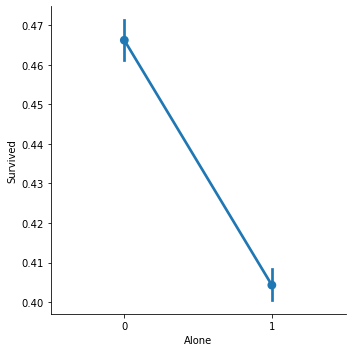

In [41]:
# Adding a column Family_Size
train_data['Family_Size'] = 0
train_data['Family_Size'] = train_data['Parch']+train_data['SibSp']
 
# Adding a column Alone
train_data['Alone'] = 0
train_data.loc[train_data.Family_Size == 0, 'Alone'] = 1

# if Family_Size has outliers
sns.boxplot(x = 'Family_Size', data = train_data)

# Factorplot for Family_Size
sns.catplot(x ='Family_Size', y ='Survived', data = train_data, kind="point")
 
# Factorplot for Alone
sns.catplot(x ='Alone', y ='Survived', data = train_data, kind="point")

Family_Size denotes the number of people in a passenger’s family. It is calculated by summing the SibSp and Parch columns of a respective passenger. Also, another column Alone is added to check the chances of survival of a lone passenger against the one with a family. 

- If a passenger is alone, the survival rate is less.

- If the family size is greater than 5, chances of survival decrease considerably. And there is some outlier at Family_Size = 9

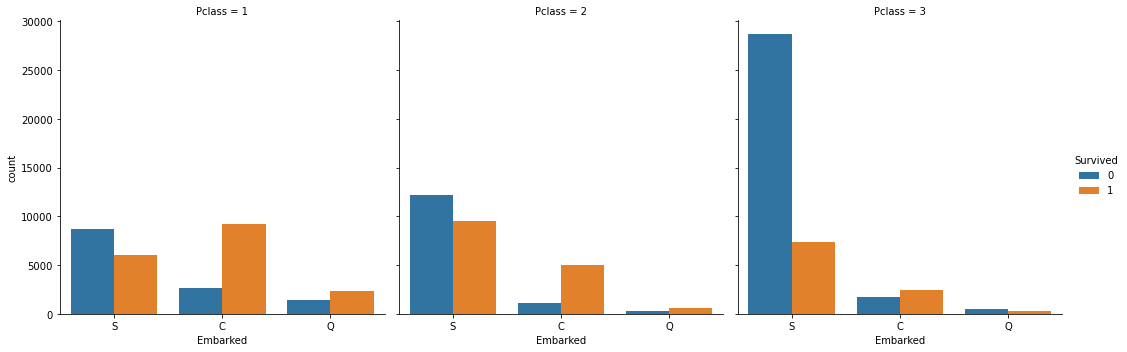

In [42]:
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = train_data)

Some observations: 

Majority of class 3 passengers boarded from S.
S looks lucky for class 1 and 2 passengers compared to class 3.
People from C have more chance to survived

<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

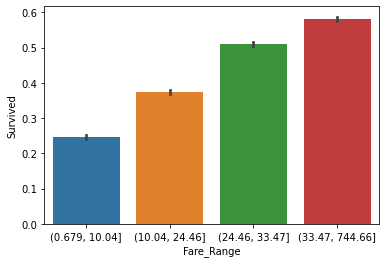

In [43]:
# Divide Fare into 4 bins
train_data['Fare_Range'] = pd.qcut(train_data['Fare'], 4)
 
sns.barplot(x ='Fare_Range', y ='Survived',
data = train_data)

If a passenger paid a higher fare, the survival rate is more)) money matters

<AxesSubplot:xlabel='Age_Range', ylabel='Survived'>

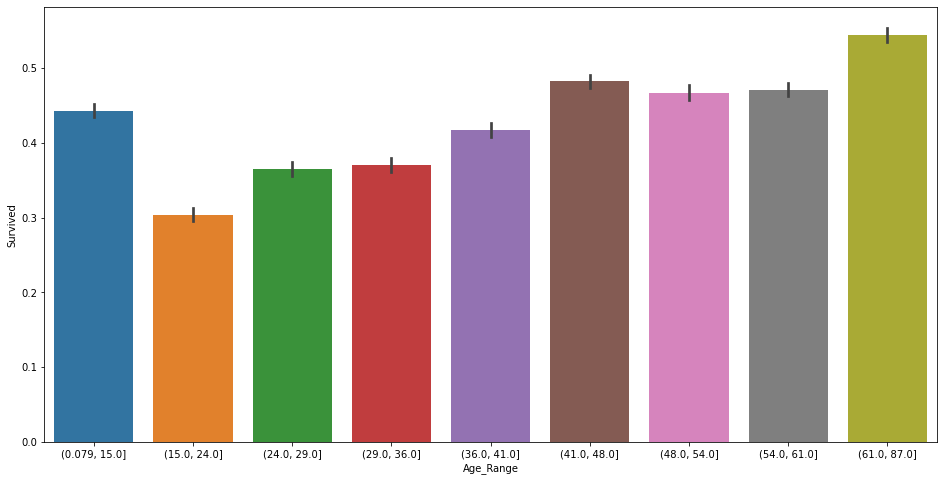

In [44]:
# Divide Age into 8 bins
train_data['Age_Range'] = pd.qcut(train_data['Age'], 9)

plt.figure(figsize=(16,8))
sns.barplot(x ='Age_Range', y ='Survived',
data = train_data)

Childrens and aged people have more chance to survive